Load the downloaded edge list using your preferred tool (R or Python) and module/package (e.g. igraph). Let’s call this “Network A”

In [521]:

import numpy as np
import pandas as pd
from scipy.io import mmread
import networkx as nw


In [522]:
cell_matrix = mmread(r'C:\Users\Sid\Downloads\soc-karate\soc-karate.mtx')


In [523]:
cell_matrix

<34x34 sparse matrix of type '<class 'numpy.float64'>'
	with 156 stored elements in COOrdinate format>

Convert to a dataframe

In [524]:
gph  = nw.Graph(cell_matrix)


In [525]:
#Q2
import scipy.sparse

In [526]:
df = pd.DataFrame.sparse.from_spmatrix(cell_matrix)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [527]:
#Type
#number of nodes = 34
#number of edges = 78
#average degree = 4.5882
#Undirected graph
nw.info(gph)

'Name: \nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882'

In [528]:
#Undirected graph 
nw.number_of_nodes(gph) #889
nw.number_of_edges(gph) #2914
nw.is_directed(gph) #false

False

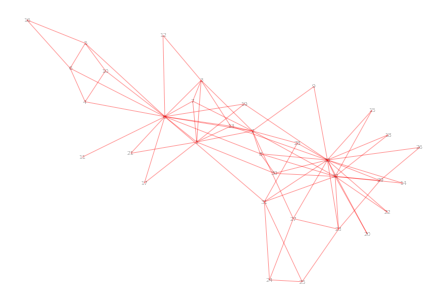

In [529]:
import matplotlib.pyplot as plt
nw.draw(gph,with_labels = 'True',centre = 'array-like'
                    ,weight = 'weight',alpha =0.3,linewidth = 0.0001,
                   node_color = 'blue',edge_color = 'red',node_size = 0.001,font_size = 6)
plt.show()

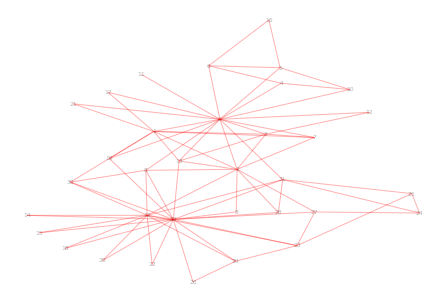

In [530]:
nw.draw_kamada_kawai(gph,with_labels = 'True',centre = 'array-like'
                    ,weight = 'weight',alpha =0.3,linewidth = 0.0001,
                   node_color = 'blue',edge_color = 'red',node_size = 0.001,font_size = 6 )

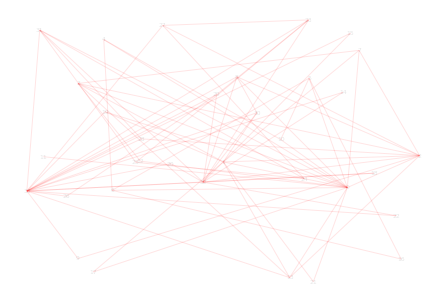

In [531]:
nw.draw_random(gph,with_labels = 'True',centre = 'array-like'
                    ,weight = 'weight',alpha =0.1,linewidth = 0.0001,
                   node_color = 'blue',edge_color = 'red',node_size = 0.001,font_size = 6 )

In [532]:
#basic analysis
#Degree distribution of nodes
deg =nw.degree(gph)
deg


DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

NETWORK A  STATISTICS
    1.Degree
    2.Closeness
    3.Clustering
    4.Pagerank
    5. Eccentricity

In [533]:
d1 =dict(nw.degree(gph))

In [534]:
#closeness centrality
d2=nw.closeness_centrality(gph)
#nw.closeness_centrality(G)

In [535]:
#degree distribution: number of nodes connected to each node
#Clustering coefficient -> actual number pf links present between neighbors/total possible links
d3 =nw.clustering(gph)
#nw.clustering(G)

In [536]:
#page rank
d4=nw.pagerank(gph)
#nw.pagerank(G)

In [537]:
d5 =nw.eccentricity(gph)
#nw.eccentricity(G)

In [538]:
df1= pd.DataFrame([d1,d2,d3,d4,d5])#,columns = ["degree centrality","closeness centrality",
df1 = df1.transpose()                                        #     "clustering","pagerank","eccentricity"])

In [539]:
#df1.
df1.columns = ["degree ","closeness centrality","clustering","pagerank","eccentricity"]

In [540]:
df1.head()

,degree,closeness centrality,clustering,pagerank,eccentricity
0,16.0,0.568966,0.150000,0.097002,3.0
1,9.0,0.485294,0.333333,0.052878,3.0
2,10.0,0.559322,0.244444,0.057078,3.0
3,6.0,0.464789,0.666667,0.035861,3.0
4,3.0,0.379310,0.666667,0.021979,4.0


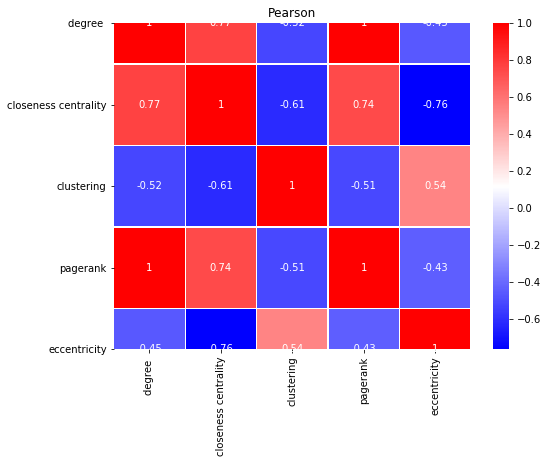

In [541]:
import seaborn as sns
sns.heatmap(df1.corr(),annot =True,cmap = 'bwr',linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.title('Pearson')
plt.show()

In [542]:
int((nw.number_of_nodes(gph))/2)

17

In [543]:
import random
i =0
k = int((nw.number_of_nodes(gph))/2)
rg_node= []
rg_edge = []
for keys in deg:
    if i < k: #444:#int(nw.number_of_nodes(gph)/2):
        redge = random.choice(list(deg))
        rnode = keys
        rg_node.append(rnode)
        #print(type(keys))
        rg_edge.append(redge)
        i+=1
    

In [544]:
rg_edge

[(8, 5),
 (22, 2),
 (29, 4),
 (8, 5),
 (5, 4),
 (0, 16),
 (12, 2),
 (1, 9),
 (21, 2),
 (8, 5),
 (2, 10),
 (13, 5),
 (32, 12),
 (30, 4),
 (14, 2),
 (8, 5),
 (11, 1)]

In [545]:
rg_node

[(0, 16),
 (1, 9),
 (2, 10),
 (3, 6),
 (4, 3),
 (5, 4),
 (6, 4),
 (7, 4),
 (8, 5),
 (9, 2),
 (10, 3),
 (11, 1),
 (12, 2),
 (13, 5),
 (14, 2),
 (15, 2),
 (16, 2)]

In [546]:
G=nw.Graph()


In [547]:
G.add_edges_from(rg_edge)
#G.add_nodes_from(rg_node)

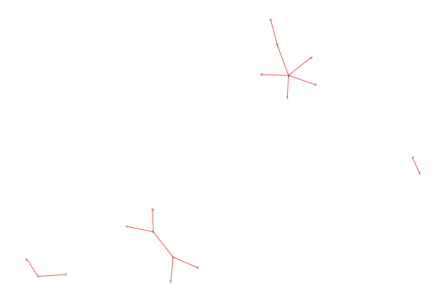

In [548]:
import matplotlib.pyplot as plt
nw.draw(G,with_labels = 'True',centre = 'array-like'
                    ,weight = 'weight',alpha =0.5,linewidth = 0.0001,
                   node_color = 'blue',edge_color = 'red',node_size = 0.001,font_size = 3)
plt.show()

In [549]:
nw.number_of_nodes(G) #367
nw.number_of_edges(G) #353
nw.is_directed(G) #false

False

NETWORK SAMPLE  STATISTICS
    1.Degree
    2.Closeness
    3.Clustering
    4.Pagerank
    5. Average shortest path

In [550]:
d1rs =dict(nw.degree(G))

In [551]:
#closeness centrality
d2rs=nw.closeness_centrality(G)
#nw.closeness_centrality(G)

In [552]:
#degree distribution: number of nodes connected to each node
#Clustering coefficient -> actual number pf links present between neighbors/total possible links
d3rs =nw.clustering(G)
#nw.clustering(G)

In [553]:
#page rank
d4rs=nw.pagerank(G)
nw.pagerank(G)

{8: 0.035460992907801414,
 5: 0.09574468085106386,
 22: 0.034158174814102535,
 2: 0.15191579884713072,
 29: 0.035460992907801414,
 4: 0.09574468085106383,
 0: 0.05555555555555555,
 16: 0.05555555555555555,
 12: 0.06456576359913802,
 1: 0.08108199386296544,
 9: 0.04279233640185062,
 21: 0.034158174814102535,
 10: 0.034158174814102535,
 13: 0.035460992907801414,
 32: 0.03577462718621002,
 30: 0.035460992907801414,
 14: 0.034158174814102535,
 11: 0.04279233640185062}

In [554]:
for C in (G.subgraph(c).copy() for c in nw.connected_components(G)):
        d5rs = nw.average_shortest_path_length(C)
        print(nw.average_shortest_path_length(C))
#nw.eccentricity(G)

1.9333333333333333
1.9047619047619047
1.0
1.3333333333333333


In [555]:
dict(nw.degree(gph)).values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

In [556]:
#Density of the graph -> number of edges present/total number of edges->0.06 ,hence sparse graph
nw.density(gph) #0.007382523130554626


0.13903743315508021

In [557]:
nw.density(G)  #0.005256026563035095

0.0915032679738562

In [558]:
nw.info(G)

'Name: \nType: Graph\nNumber of nodes: 18\nNumber of edges: 14\nAverage degree:   1.5556'

In [559]:
nw.clustering(G)

{8: 0,
 5: 0,
 22: 0,
 2: 0,
 29: 0,
 4: 0,
 0: 0,
 16: 0,
 12: 0,
 1: 0,
 9: 0,
 21: 0,
 10: 0,
 13: 0,
 32: 0,
 30: 0,
 14: 0,
 11: 0}

In [560]:
#for i in nw.clustering(gph).items():
 #   print(i)

In [561]:
#average clustering -> more average clustering -> more tightly knitted -> 38% 
nw.average_clustering(gph) #0.15284694735014312
#nw.average_clustering(G) #0


0.5706384782076823

In [562]:
#diameter of a network-> maximum shortest path from A to B
nw.diameter(gph) #13
#nw.diameter(G) #

5

In [563]:
#nw.draw(gph)
#plt.show()

In [564]:
#nw.draw(G)
#plt.show()
nw.degree_centrality(gph)

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [565]:
nw.closeness_centrality(G)

{8: 0.13368983957219252,
 5: 0.21008403361344538,
 22: 0.17647058823529413,
 2: 0.3025210084033613,
 29: 0.13368983957219252,
 4: 0.21008403361344538,
 0: 0.058823529411764705,
 16: 0.058823529411764705,
 12: 0.21176470588235294,
 1: 0.11764705882352941,
 9: 0.0784313725490196,
 21: 0.17647058823529413,
 10: 0.17647058823529413,
 13: 0.13368983957219252,
 32: 0.14117647058823532,
 30: 0.13368983957219252,
 14: 0.17647058823529413,
 11: 0.0784313725490196}

In [566]:
nw.betweenness_centrality(gph,normalized = True)

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [567]:
nw.betweenness_centrality(G,normalized = True)

{8: 0.0,
 5: 0.051470588235294115,
 22: 0.0,
 2: 0.10294117647058823,
 29: 0.0,
 4: 0.051470588235294115,
 0: 0.0,
 16: 0.0,
 12: 0.03676470588235294,
 1: 0.007352941176470588,
 9: 0.0,
 21: 0.0,
 10: 0.0,
 13: 0.0,
 32: 0.0,
 30: 0.0,
 14: 0.0,
 11: 0.0}

In [568]:
nw.pagerank(G)

{8: 0.035460992907801414,
 5: 0.09574468085106386,
 22: 0.034158174814102535,
 2: 0.15191579884713072,
 29: 0.035460992907801414,
 4: 0.09574468085106383,
 0: 0.05555555555555555,
 16: 0.05555555555555555,
 12: 0.06456576359913802,
 1: 0.08108199386296544,
 9: 0.04279233640185062,
 21: 0.034158174814102535,
 10: 0.034158174814102535,
 13: 0.035460992907801414,
 32: 0.03577462718621002,
 30: 0.035460992907801414,
 14: 0.034158174814102535,
 11: 0.04279233640185062}

In [569]:
#nw.eccentricity(G)
#G1=nw.Graph() 
for C in (G.subgraph(c).copy() for c in nw.connected_components(G)):
      print(nw.average_shortest_path_length(C))

1.9333333333333333
1.9047619047619047
1.0
1.3333333333333333


In [570]:
#pearson correlation coefficient
nw.degree_pearson_correlation_coefficient(gph) #-0.028776339281457734
nw.degree_pearson_correlation_coefficient(G) #-0.47861497205290643

-0.4907407407407407

In [571]:
#G1 = nw.cubical_graph()
#1.add_edges_from(rg_edge)
#nw.draw(G1)
def _coo_to_sparse_series(A, dense_index=False):
    """ Convert a scipy.sparse.coo_matrix to a SparseSeries.
    Use the defaults given in the SparseSeries constructor. """
    s = Series(A.data, MultiIndex.from_arrays((A.row, A.col)))
    s = s.sort_index()
    s = s.to_sparse()  # TODO: specify kind?
    # ...
    return s

In [572]:
#import pandas as pd
#df = _coo_to_sparse_series(cell_matrix)

In [573]:
#df1.head()

In [574]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()


In [575]:
#df2 = df[df.isnull() =='True'].drop()
df.loc[0:5,0:5]#.corr(method = 'pearson')

,0,1,2,3,4,5
0,0.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0


CREATION OF RANDOM NETWORK

In [576]:
G_random = nw.dense_gnm_random_graph(nw.number_of_nodes(gph),nw.number_of_edges(gph))

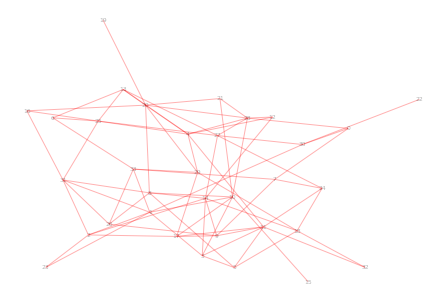

In [577]:

nw.draw(G_random,with_labels = 'True',centre = 'array-like'
                    ,weight = 'weight',alpha =0.3,linewidth = 0.00001,
                   node_color = 'blue',edge_color = 'red',node_size = 0.001,font_size = 6)
plt.show()

In [578]:
nw.number_of_nodes(G_random)
nw.number_of_edges(G_random)
nw.is_directed(G_random)

False

In [579]:
dict(nw.degree(gph)).values()

dict_values([16, 9, 10, 6, 3, 4, 4, 4, 5, 2, 3, 1, 2, 5, 2, 2, 2, 2, 2, 3, 2, 2, 2, 5, 3, 3, 2, 4, 3, 4, 4, 6, 12, 17])

In [580]:
nw.info(G_random)

'Name: \nType: Graph\nNumber of nodes: 34\nNumber of edges: 78\nAverage degree:   4.5882'

NETWORK RANDOM STATISTICS
    1.Degree
    2.Closeness
    3.Clustering
    4.Pagerank
    5. Eccentricity

In [581]:
d1random =dict(nw.degree(G_random))

In [582]:
#closeness centrality
d2random=nw.closeness_centrality(G_random)
#nw.closeness_centrality(G)

In [583]:
#degree distribution: number of nodes connected to each node
#Clustering coefficient -> actual number pf links present between neighbors/total possible links
d3random =nw.clustering(G_random)
#nw.clustering(G)

In [584]:
#page rank
d4random=nw.pagerank(G_random)
#nw.pagerank(G)

In [585]:
d5random =nw.eccentricity(G_random)
#nw.eccentricity(G)

In [586]:
dfrandom= pd.DataFrame([d1random,d2random,d3random,d4random,d5random])#,columns = ["degree centrality","closeness centrality",
dfrandom = dfrandom.transpose()                                        #     "clustering","pagerank","eccentricity"])

In [587]:
#df1.
dfrandom.columns = ["degree ","closeness centrality","clustering","pagerank","eccentricity"]

In [588]:
dfrandom.head()

,degree,closeness centrality,clustering,pagerank,eccentricity
0,3.0,0.392857,0.000000,0.021782,4.0
1,7.0,0.478261,0.142857,0.043931,4.0
2,5.0,0.434211,0.200000,0.031663,4.0
3,5.0,0.452055,0.200000,0.030786,4.0
4,7.0,0.478261,0.238095,0.041361,4.0


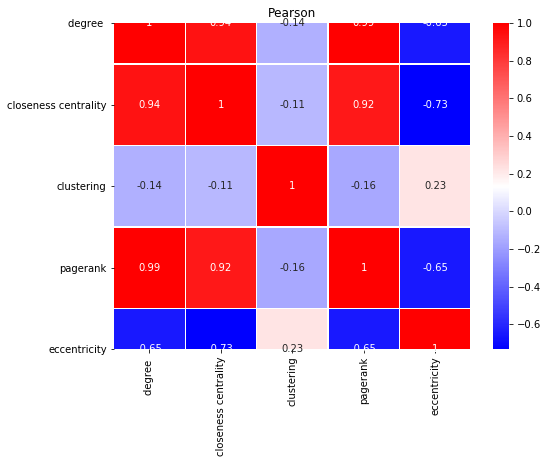

In [589]:
import seaborn as sns
sns.heatmap(dfrandom.corr(),annot =True,cmap = 'bwr',linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(8,6)
plt.title('Pearson')
plt.show()

In [590]:
nw.density(G_random)

0.13903743315508021

In [591]:
for C in (G_random.subgraph(c).copy() for c in nw.connected_components(G_random)):
      print(nw.average_shortest_path_length(C))

2.409982174688057


In [592]:
nw.degree_pearson_correlation_coefficient(G_random)

-0.20068134502555043

STATISTICAL TEST


In [593]:
from scipy import stats
f1 = np.var(df1['clustering'],ddof =1)
f2 = np.var(dfrandom['clustering'],ddof =1)
lendf1 = len(df1['clustering']) -1
lendf2 = len(dfrandom['clustering']) -1
f =f1/f2


F test -> Check if data is from same population
If p value <0.05 null hypothesis is rejected(homoskedasticity rejected)
Which means alternative hypothesis (heteroskedasticity between Network A and Network Random is possible

In [594]:
pval_1 = stats.f.cdf(f,lendf1,lendf2)
pval_1

0.9976019164617174

In [595]:
pval_2 = stats.f.sf(f,lendf1,lendf2)
pval_2

0.0023980835382825874

In [596]:
pval_bothsides = min(pval_1,pval_2)*2
pval_bothsides

0.004796167076565175

P value is very less (order of -9) hence null hypothesis rejected 


In [597]:
#F VALUE
f

2.74433888350248

Welch T test

In [599]:
df1.clustering

0     0.150000
1     0.333333
2     0.244444
3     0.666667
4     0.666667
5     0.500000
6     0.500000
7     1.000000
8     0.500000
9     0.000000
10    0.666667
11    0.000000
12    1.000000
13    0.600000
14    1.000000
15    1.000000
16    1.000000
17    1.000000
18    1.000000
19    0.333333
20    1.000000
21    1.000000
22    1.000000
23    0.400000
24    0.333333
25    0.333333
26    1.000000
27    0.166667
28    0.333333
29    0.666667
30    0.500000
31    0.200000
32    0.196970
33    0.110294
Name: clustering, dtype: float64

In [ ]:
t1 = df1.clustering
t2 = dfrandom.clustering
stats.ttest_ind(t1,t2,equal_var = False)

Once again p value is of the order of -9 which means that the alternate hypothesis is more valid
Which signifies that the clustering of networkA and network random are different